# The implementation of linear regression. 
## Author: Bojian Xu, bojianxu@ewu.edu

It supports the following: 

- multiple features, i.e., $d\geq 1$
- regularization: $E(w) = \frac{1}{N}\lVert Xw-y\rVert^2 + \frac{\lambda}{N} \lVert w\rVert^2$
- using the in-form calculation
- using the gradient descent


In [13]:
import numpy as np
from numpy.random import rand as rand
from numpy.random import seed as seed
import matplotlib.pyplot as plt
from IPython.display import clear_output
import math

import linear_regression as LR
import sys

sys.path.append('..')
#from misc.utils import MyUtils

In [2]:
def display_w_2D(w, x_range = (0.0, 1.0), y_range = (0,0,1.0), color = 'red', degree = 1):
    ''' only support: degree <= 4 for demo purpose
        Don't have time to code out the generic form for any degree
    '''
    xrange = np.arange(x_range[0], x_range[1], delta)
    yrange = np.arange(y_range[0], y_range[1], delta)
    x, y = np.meshgrid(xrange,yrange)
    
    if degree == 1:
        F = w[0] + w[1] * x - y
    elif degree == 2:
        F = w[0] + w[1] * x + w[2] * np.power(x,2) - y
    elif degree == 3:
        F = w[0] + w[1] * x + w[2] * np.power(x,2) + w[3] * np.power(x,3) - y
    elif degree == 4:
        F = w[0] + w[1] * x + w[2] * np.power(x,2) + w[3] * np.power(x,3) + w[4] * np.power(x,4) - y
    else:
        print('Z space degree is too high. Not supported now\n')
        quit()

    plt.contour(x, y, (F), [0], colors = color)

In [3]:
seed()

In [4]:
n = 100

In [5]:
r = 2

In [6]:
delta = 0.01

In [7]:
d = 1

In [8]:
x = np.linspace(start=0.01, stop=1.99, num=n)
y = np.power(x,r) * 2 + np.power(x,r)  + np.random.normal(loc=0.0, scale=0.5, size=n)
#print(x)
#print(y)

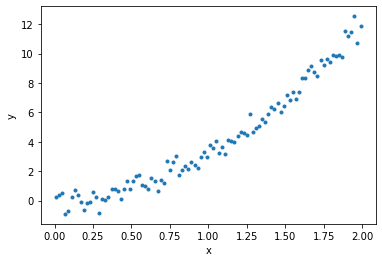

In [9]:
# display the data samples
plt.scatter(x, y, marker='.')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [14]:
z_r = r+2

lr = LinearRegression()


lr.fit(x.reshape(-1,1), y.reshape(-1,1), CF = False, lam = 0.1, eta = 0.001, epochs = 10000, degree = z_r)


print('Learned w:\n', lr.w)
#print('MSE:\n', lr.MSE)



[[1.00000000e-02 1.00000000e-04 1.00000000e-06 1.00000000e-08]
 [3.00000000e-02 9.00000000e-04 2.70000000e-05 8.10000000e-07]
 [5.00000000e-02 2.50000000e-03 1.25000000e-04 6.25000000e-06]
 [7.00000000e-02 4.90000000e-03 3.43000000e-04 2.40100000e-05]
 [9.00000000e-02 8.10000000e-03 7.29000000e-04 6.56100000e-05]
 [1.10000000e-01 1.21000000e-02 1.33100000e-03 1.46410000e-04]
 [1.30000000e-01 1.69000000e-02 2.19700000e-03 2.85610000e-04]
 [1.50000000e-01 2.25000000e-02 3.37500000e-03 5.06250000e-04]
 [1.70000000e-01 2.89000000e-02 4.91300000e-03 8.35210000e-04]
 [1.90000000e-01 3.61000000e-02 6.85900000e-03 1.30321000e-03]
 [2.10000000e-01 4.41000000e-02 9.26100000e-03 1.94481000e-03]
 [2.30000000e-01 5.29000000e-02 1.21670000e-02 2.79841000e-03]
 [2.50000000e-01 6.25000000e-02 1.56250000e-02 3.90625000e-03]
 [2.70000000e-01 7.29000000e-02 1.96830000e-02 5.31441000e-03]
 [2.90000000e-01 8.41000000e-02 2.43890000e-02 7.07281000e-03]
 [3.10000000e-01 9.61000000e-02 2.97910000e-02 9.235210

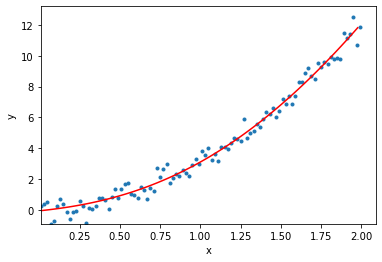

In [15]:
plt.scatter(x, y, marker='.')
display_w_2D(lr.w, x_range = (min(x),max(x)), y_range = (min(y),max(y)), color = 'red', degree = z_r)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [16]:
plt.scatter(np.arange(len(lr.MSE)-1000), lr.MSE[1000:], marker='.')
plt.xlabel('epochs')
plt.ylabel('MSE')
plt.show()

AttributeError: 'LinearRegression' object has no attribute 'MSE'

In [10]:
class MyUtils:
    def normalize_0_1(X):
        ''' Normalize the value of every feature into the [0,1] range, using formula: x = (x-x_min)/(x_max - x_min)
            1) First shift all feature values to be non-negative by subtracting the min of each column 
               if that min is negative.
            2) Then divide each feature value by the max of the column if that max is not zero. 
            
            X: n x d matrix of samples, excluding the x_0 = 1 feature. X can have negative numbers.
            return: the n x d matrix of samples where each feature value belongs to [0,1]
        '''

        n, d = X.shape
        X_norm = X.astype('float64') # Have a copy of the data in float

        for i in range(d):
            col_min = min(X_norm[:,i])
            col_max = max(X_norm[:,i])
            gap = col_max - col_min
            if gap:
                X_norm[:,i] = (X_norm[:,i] - col_min) / gap
            else:
                X_norm[:,i] = 0 #X_norm[:,i] - X_norm[:,i]
        
        return X_norm
    def normalize_neg1_pos1(X):
        ''' Normalize the value of every feature into the [-1,+1] range. 
            
            X: n x d matrix of samples, excluding the x_0 = 1 feature. X can have negative numbers.
            return: the n x d matrix of samples where each feature value belongs to [-1,1]
        '''

        n, d = X.shape
        X_norm = X.astype('float64') # Have a copy of the data in float

        for i in range(d):
            col_min = min(X_norm[:,i])
            col_max = max(X_norm[:,i])
            col_mid = (col_max + col_min) / 2
            gap = (col_max - col_min) / 2
            if gap:
                X_norm[:,i] = (X_norm[:,i] - col_mid) / gap
            else: 
                X_norm[:,i] = 0 #X_norm[:,i] - X_norm[:,i]

        return X_norm

    
    def z_transform(X, degree = 2):
        
        ''' Transforming traing samples to the Z space
            X: n x d matrix of samples, excluding the x_0 = 1 feature
            degree: the degree of the Z space
            return: the n x d' matrix of samples in the Z space, excluding the z_0 = 1 feature.
            It can be mathematically calculated: d' = \sum_{k=1}^{degree} (k+d-1) \choose (d-1)

        '''
 
        # Set r to degree
        r = degree
        
        # degree $leq$ 1, return x 
        if r <= 1:
            return X
        
        # n is the number of X's rows --> The number of points
        # d is the number of X's cols --> The dimensionality 
        n,d = np.shape(X)
        
        # Z is going to be a copy of x = Starts out exactly the same 
        Z = X.copy()
        
        
        
        # next it is necessary to create all of the buckets
        # a bucket is a matrix with all the possible combinations of multiplications which acheives a certain, single degree 
        # the # of buckets is conceptuall known d -r -1 Choose d - 1 
        # let's save those numbers in an array 
        
        #there will b r buckets 
        
        # B is a list with a bunch of buckets  
        B = []
        
        
        # the number of buckets 
        for i in range(r):
            # append a number - the ith bucket size which can be calculated w/ this equation
            # math.comb = n choose k 
            m = d+i # 0-based indexing t.f. the -1 is gone, d is the size of the X matrix 
            k = d-1 
            B.append(math.comb(m,k))
    
   
        ell = np.arange(np.sum(B)) # The summation of all the elements in the B array

        q = 0 # the total size of all of the buckets before the previous bucket
        
        p = d # the size of the previous bucket
        g = p
        
        # at the beginning, there is one bucket 
        for i in range(1, r): # 1, 2, 3, ... r-1 
            
            # create each bucket up to the ith bucket, visit the previous bucket 
            #print("New I Loop\ni: ", i)
            # go through every element in the previous bucket - the range starting from q going to q+p 
            for j in range(q, p):
                head = ell[j]

        
                # this tracks the index of the new column
           
            
                # go from head to lexographically highest feature
                for k in range(head, d):

                    #elementwise multiplication
                    temp = (Z[: ,j] * X[:, k]).reshape(-1,1)
                    # insert new column temp on right side
                    Z = np.append(Z, temp, axis=1)
                    
                    # j is hte index of the column you are currently computing
                    ell[g] = k # just multiplied w/ x's k column

                    g += 1

            # adding previous bucket into p the new previous buck
            q = p 

            # the new previous bucket is going to be i which is the current i but will soon be updated 
            p += B[i] 
 

        
        assert Z.shape[1] == np.sum(B)
        
        return Z
    
    

In [11]:

class LinearRegression:
    def __init__(self):
        self.w = None   # The (d+1) x 1 numpy array weight matrix
        self.degree = 1
        
        
    def fit(self, X, y, CF = True, lam = 0, eta = 0.01, epochs = 1000, degree = 1):
        ''' Find the fitting weight vector and save it in self.w. 
            
            parameters: 
                X: n x d matrix of samples, n samples, each has d features, excluding the bias feature
                y: n x 1 matrix of lables
                CF: True - use the closed-form method. False - use the gradient descent based method
                lam: the ridge regression parameter for regularization
                eta: the learning rate used in gradient descent
                epochs: the maximum epochs used in gradient descent
                degree: the degree of the Z-space
        '''
        self.degree = degree
        X = MyUtils.z_transform(X, degree = self.degree)
        print(X)
        if CF:
            self._fit_cf(X, y, lam)
        else: 
            self._fit_gd(X, y, lam, eta, epochs)
 


            
    def _fit_cf(self, X, y, lam = 0):
        ''' Compute the weight vector using the closed-form method.
            Save the result in self.w
        
            X: n x d matrix, n samples, each has d features, excluding the bias feature
            y: n x 1 matrix of labels. Each element is the label of each sample. 
        '''
        
        # add bias column 
        X = np.insert(X, 0, 1, axis=1)
        # attain the X transpose
        X_T = np.transpose(X)
        
        n, d = np.shape(X)
        
        # Create the Identity Matrx: 
        I = np.identity(d)
       
        # Create (X^T * X)^-1
        a = (np.linalg.pinv(X_T @ X + lam * I))
        # Create X_T * y 
        b = X_T @ y 

        # Set w_star to create w_star: [X_T * y] * [X_T * y]
      
        self.w = a @ b
        

        ## delete the `pass` statement below.
        ## enter your code here that implements the closed-form method for
        ## linear regression 
        
                


    
    
    def _fit_gd(self, X, y, lam = 0, eta = 0.01, epochs = 1000):
        ''' Compute the weight vector using the gradient desecent based method.
            Save the result in self.w

            X: n x d matrix, n samples, each has d features, excluding the bias feature
            y: n x 1 matrix of labels. Each element is the label of each sample. 
        '''

        ## enter your code here that implements the gradient descent based method
        ## for linear regression 
        
        ### Fix Up X ###
        
        
        
        # Add Bias Column 
        X = np.insert(X, 0, 1, axis=1)
        
        # Create the Transposed X: X_T
        X_T = np.transpose(X)
        
        n, d = np.shape(X)
        
        
        ### Initialize Variables ### 
        
        # Initialize w to a (dx1)x1 vector
        w_star = np.zeros((d,1))
        
        # Initialize a: I - (2nu / N) * (X_T @ X)
        
        # Initialize the identity matrix 
        I = np.identity(d)
        
        a = I - (((2 * eta) / n) * (X_T @ X + (lam * I)))
        
        # Initialize b: (2nu/N)*X_T @ y
        b = (2 * eta / n) * (X_T @ y)
        
        ### Run For Loop ###
        for i in range(epochs):
            # Update w
            w_star = a @ w_star + b
        self.w = w_star
  

    
    def predict(self, X):
        ''' parameter:
                X: n x d matrix, the n samples, each has d features, excluding the bias feature
            return:
                n x 1 matrix, each matrix element is the regression value of each sample
        '''
        X = MyUtils.z_transform(X, degree = self.degree)
        
        # This takes X and inserts a 0 columnn (the bias) in the front
        X = np.insert(X, 0, 1, axis=1)

        return X @ self.w
        #for x in X:
            #out[i] = x @ self.w
           # i+= 1
 
        #return out

        ## delete the `pass` statement below.
        
        ## enter your code here that produces the label vector for the given samples saved
        ## in the matrix X. Make sure your predication is calculated at the same Z
        ## space where you trained your model. 


        

    
    
    def error(self, X, y):
        ''' parameters:
                X: n x d matrix of future samples
                y: n x 1 matrix of labels
            return: 
                the MSE for this test set (X,y) using the trained model
        '''
        X = MyUtils.z_transform(X, degree = self.degree)
        X = np.insert(X, [0], 1, axis=1)
        
        n,d = np.shape(X)
        X_T = np.transpose(X)
    
        xw = X @ self.w 
        
        
        
        error = np.sum((xw - y)** 2) / n
        
        return error
        ## enter your code here that calculates the MSE between your predicted
        ## label vector and the given label vector y, for the sample set saved in matraix x
        ## Make sure your predication is calculated at the same Z space where you trained your model. 

        


